In [4]:
%matplotlib inline
from copy import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from IPython.core.display import HTML

In [5]:
keywords = ['cellstates', 'probabilities', 'sample']
mapping = {1:'(',
           2:')',
           3:']',
           4:'['}

In [6]:
check_files = [f[10:] for f in os.listdir("cv") if 'cellstates' in f]
#prototyping
check_files = ['_lm_test3_epoch41.21_1.0969.txt']


#need to modify for > 1 sample
#curr_cellstates = pd.read_csv('cellstates'+check_files[0], header=None)
curr_probs = pd.read_csv('probabilities'+check_files[0], header=None)
curr_probs.columns = ['1','2','3','4']
curr_probs = curr_probs.apply(lambda x: np.exp(x))
curr_sample = pd.read_csv('sample'+check_files[0], header=None).T
curr_sample.columns = ['s']
#curr_probs['s'] = curr_sample.s

In [7]:
sample_text = ''.join([mapping[i] for i in list(curr_sample.s)[:-1]])
sample_text

'([])[[][[([()(]])(]]][[]]]]]([]([)]]([())[)(]][)('

In [8]:
def parse_paren(some_string, some_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    html_parse = '<div style="font-size:18pt; line-height: 24px">'
    depth = 0
    for c in some_string:
        if c == "(" or c == "[":
            #print " "*depth,"("
            html_parse += '<span style="color:{0};">{1}</span>'.format(color_codes[depth], c)
            depth+=1
            
        else:
            if depth > 0:
                depth-=1
            html_parse += '<span style="color:{0};">{1}</span>'.format(color_codes[depth], c)

            #print " "*depth,")"
    html_parse += "</div>"
    return HTML(html_parse)
pal5 = sns.color_palette("RdBu_r", 6)

parse_paren(sample_text, pal5)

In [28]:
sns.light_palette("navy", as_cmap=True)

In [10]:
def get_depth_for_samples(some_text):
    depth = 0
    depth_array = []
    for c in some_text:
        if c == "(" or c == "[":
            depth+=1
        elif depth > 0:
            depth-=1
        depth_array.append(depth)
    
    return depth_array

In [11]:
def get_correct_array(some_text):
    depth_array = []
    correct_array = []
    for c in some_text:
        if c == "(" or c == "[":
            depth_array.append(c)
            correct_array.append('g')
        else:
            try:
                curr_open = depth_array.pop()
                if (curr_open == "(" and c == ")") or (curr_open == "[" and c == "]"):
                    correct_array.append('g')
                else:
                    correct_array.append('r')
            except:
                correct_array.append('r')
    return correct_array
str(get_correct_array(sample_text))

"['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'g', 'g', 'g', 'r', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'g', 'r', 'g', 'r', 'r', 'g', 'r', 'g']"

49
49


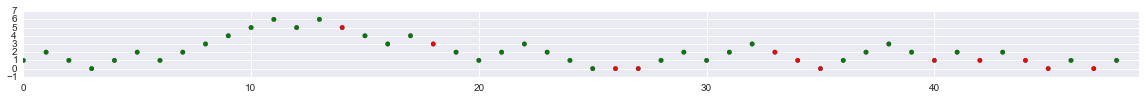

In [43]:
plt.figure(figsize=(20,4))
ax1 = plt.subplot(312)
depths_sample = get_depth_for_samples(sample_text)
print len(depths_sample)
correct_sample = get_correct_array(sample_text)
x_vals = np.linspace(0,48,49)
print len(x_vals)
plt.scatter(x_vals, depths_sample, c=correct_sample)
plt.xlim([0,49])
plt.show()

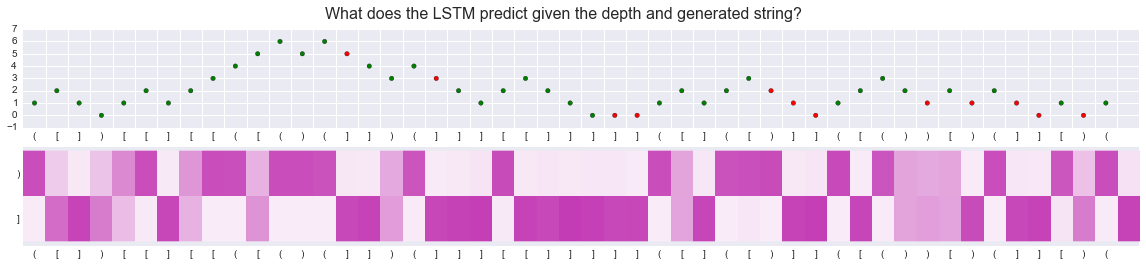

In [89]:
x = np.array(curr_probs[['2','4']]).T#.reshape(4,50)
fig = plt.figure(figsize=(20,6))


ax1 = plt.subplot(312)
depths_sample = get_depth_for_samples(sample_text)
correct_sample = get_correct_array(sample_text)
x_vals = np.linspace(0,48,49)
plt.scatter(x_vals, depths_sample, c=correct_sample)

ax = plt.subplot(313, sharex=ax1)

colors = sns.light_palette((315, 80, 50), input="husl", as_cmap=True)#sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)
plt.imshow(x, interpolation='nearest', aspect=2, cmap=colors)
plt.xticks([i+.5 for i in xrange(50)])
plt.yticks([.5,1.5]) #
#plt.colorbar()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'

plt.grid(b=True, which='both', color='0.65',linestyle='')

import matplotlib.ticker as ticker

# a is an axes object, from figure.get_axes()

# Hide major tick labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.yaxis.set_major_formatter(ticker.NullFormatter())

# Customize minor tick labels
ax.xaxis.set_minor_locator(ticker.FixedLocator([i for i in xrange(50)]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter([mapping[i] for i in list(curr_sample.s)[:-1]]))

ax.yaxis.set_minor_locator(ticker.FixedLocator([0,1]))
ax.yaxis.set_minor_formatter(ticker.FixedFormatter([')',']']))

figtitle = 'What does the LSTM predict given the depth and generated string?' 
t = fig.text(.5, .65, figtitle,  
               horizontalalignment='center',
               fontsize=16) 
plt.show()

In [215]:
##cell plot

NameError: name 'df_am' is not defined